### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA = '../Data/fish.csv'

In [3]:
fishDF = pd.read_csv(DATA, usecols=[0,1,2])

In [4]:
fishDF.head(2)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3


In [5]:
# Bream과 Smelt 만 가져오기
mask = (fishDF.Species == 'Bream') | (fishDF.Species == 'Smelt')
twoDF = fishDF[mask]
twoDF.head(2)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3


In [6]:
# twoDF - index 재지정
twoDF.reset_index(drop=True, inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [7]:
# Species 컬럼을 수치화 => Bream: 0, Smelt: 1
twoDF['fishcode'] = twoDF.Species.replace({'Bream':0, 'Smelt':1})

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_1272\1182816986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['fishcode'] = twoDF.Species.replace({'Bream':0, 'Smelt':1})


In [8]:
twoDF.head(2), twoDF.tail(2)

(  Species  Weight  Length  fishcode
 0   Bream   242.0    25.4         0
 1   Bream   290.0    26.3         0,
    Species  Weight  Length  fishcode
 47   Smelt    19.7    14.3         1
 48   Smelt    19.9    15.0         1)

[2] 피쳐와 타겟 분리

In [9]:
# 피쳐: Weight, Length // 타겟: fishcode


features = twoDF[['Weight', 'Length']]
target = twoDF['fishcode']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [10]:
# 데이터셋 나누기 (학습용, 테스트용)
from sklearn.model_selection import train_test_split

In [13]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : *분류*일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
# random_state > random.seed 역할
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    train_size=0.8,
                                                    stratify=target,
                                                    random_state=10)

In [14]:
print(f'x_train: {x_train.shape}, {x_train.ndim}D')
print(f'y_train: {y_train.shape}, {y_train.ndim}D')

print(f'x_test: {x_test.shape}, {x_test.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

x_train: (39, 2), 2D
y_train: (39,), 1D
x_test: (10, 2), 2D
y_test: (10,), 1D


In [15]:
y_train.head()

7     0
43    1
1     0
46    1
31    0
Name: fishcode, dtype: int64

In [16]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()

fishcode
0    28
1    11
Name: count, dtype: int64

In [17]:
print(f'Bream(0) train 비율: {y_train.value_counts()[0]/y_train.shape[0]}\nSmelt(1) train 비율: {y_train.value_counts()[1]/y_train.shape[0]}')

Bream(0) train 비율: 0.717948717948718
Smelt(1) train 비율: 0.28205128205128205


In [18]:
print(f'Bream(0) test 비율: {y_test.value_counts()[0]/y_test.shape[0]}\nSmelt(1) test 비율: {y_test.value_counts()[1]/y_test.shape[0]}')

Bream(0) test 비율: 0.7
Smelt(1) test 비율: 0.3


[3-2] 피쳐 스케일링

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [21]:
# x_train 값을 기준으로 지정.
mmScaler.fit(x_train)

MinMaxScaler()

In [22]:
# MinMaxScaler 동작을 위한 학습 진행
mmScaler.min_, mmScaler.data_min_, mmScaler.data_max_, mmScaler.scale_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([1000.,   41.]),
 array([0.00100675, 0.03205128]))

In [23]:
x_train.min()

Weight    6.7
Length    9.8
dtype: float64

In [24]:
x_train.max()

Weight    1000.0
Length      41.0
dtype: float64

In [25]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_train_scaled = mmScaler.transform(x_train)
x_train_scaled

array([[3.85885432e-01, 6.47435897e-01],
       [3.12091010e-03, 7.05128205e-02],
       [2.85210913e-01, 5.28846154e-01],
       [5.53709856e-03, 1.02564103e-01],
       [9.54696466e-01, 9.19871795e-01],
       [1.32890365e-02, 1.66666667e-01],
       [4.46290144e-01, 6.47435897e-01],
       [1.00000000e+00, 8.71794872e-01],
       [0.00000000e+00, 0.00000000e+00],
       [6.97976442e-01, 7.43589744e-01],
       [4.71458774e-01, 6.79487179e-01],
       [6.47639183e-01, 7.59615385e-01],
       [4.96627404e-01, 6.95512821e-01],
       [3.02023558e-04, 2.56410256e-02],
       [6.82875264e-01, 7.75641026e-01],
       [3.12091010e-03, 4.48717949e-02],
       [7.18111346e-01, 8.07692308e-01],
       [3.35548173e-01, 5.35256410e-01],
       [9.24494111e-01, 9.51923077e-01],
       [3.02023558e-03, 3.84615385e-02],
       [6.74519279e-03, 8.33333333e-02],
       [4.46290144e-01, 6.37820513e-01],
       [3.58703312e-01, 6.15384615e-01],
       [6.07369375e-01, 7.59615385e-01],
       [6.778415

In [26]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_test_scaled = mmScaler.transform(x_test)
x_test_scaled

array([[0.0055371 , 0.07692308],
       [0.4966274 , 0.66987179],
       [0.69797644, 0.74358974],
       [0.23688714, 0.5       ],
       [0.00332226, 0.06410256],
       [0.72314507, 0.80769231],
       [0.59730192, 0.71153846],
       [0.71207087, 0.83974359],
       [0.84898822, 0.83974359],
       [0.01308769, 0.14423077]])

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [29]:
# x_train만 스케일링
model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [31]:
# 학습 후 모델 파라미터
model.classes_, model.n_samples_fit_
# model.feature_names_in_ ndarray일 경우 X

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [32]:
model.score(x_test_scaled, y_test)

1.0

[6] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의사항 : 입력데이터 ==> 2D

In [34]:
# 임의의 데이터 생성 (2D)
check_data = pd.DataFrame([[414, 27.2]], columns=[['Weight', 'Length']])
check_data

,Weight,Length
0,414,27.2


In [35]:
check_data_scaled = mmScaler.transform(check_data)
check_data_scaled

c:\Users\KDP-50\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.41004732, 0.55769231]])

In [36]:
model.predict(check_data_scaled)

array([0], dtype=int64)

In [37]:
# 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(check_data_scaled)

In [41]:
scaled_neighbors = index.reshape(-1).tolist()
scaled_neighbors

[25, 22, 17, 21, 0]

In [42]:
k_weight = x_train_scaled[scaled_neighbors][:,0] # x_train_scaled의 scaled_neighbors 인덱스의 x축(weight) 요소
k_length = x_train_scaled[scaled_neighbors][:,1] # x_train_scaled의 scaled_neighbors 인덱스의 y축(length) 요소

In [43]:
k_weight

array([0.42615524, 0.35870331, 0.33554817, 0.44629014, 0.38588543])

In [44]:
k_length

array([0.61538462, 0.61538462, 0.53525641, 0.63782051, 0.6474359 ])

In [48]:
check_data_scaled.reshape(-1)[0]

0.4100473170240613

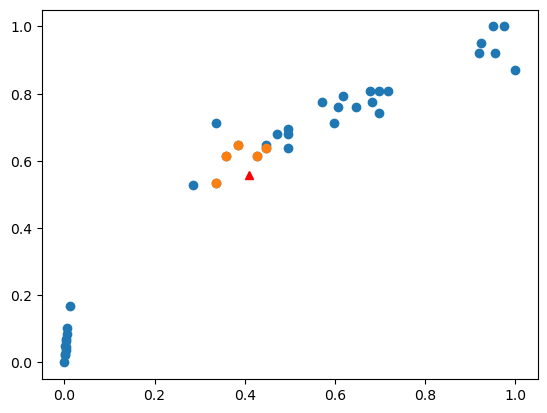

In [49]:
# 시각화

plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1]) # 스케일링된 x_train 값
plt.scatter(k_weight, k_length) # x_train_scaled에 대치되는 scaled_neighbors 인덱스의 x축(weight) - y축(length) 그래프
plt.plot(check_data_scaled.reshape(-1)[0], check_data_scaled.reshape(-1)[1], 'r^')